# Matplotlib Tips and Demos

When I first learned Python three years ago, I was often finding myself having to lookup the same thing again and again for Matplotlib. This was back pre-2.0 when there was even more issues (e.g. plotting `NaNs` with masked arrays). 

Some of this is super simple, some of it is more advanced. It is just my go-to reference

## Python 2 vs 3

All examples in this code work on both Python 2 and Python 3. The actual versions used will be printed below. Note that there are some bugs in matplotlib 3.0.1 so use at least 3.0.2 (or older for python 2 versions).

The results *should* be the same.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
#%matplotlib inline # Display inline -- May not be needed on newer platforms

import sys

print('Matplotlib Version: ' + mpl.__version__)
print('NumPy Version: ' + np.version.full_version)
print('Python Version: ' + sys.version)

import datetime
now  = datetime.datetime.now().isoformat()
print('Ran on ' + now)

Matplotlib Version: 3.0.2
NumPy Version: 1.15.4
Python Version: 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:07:29) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Ran on 2018-12-12T09:38:24.638932


## The basics

With *few* exception, all examples use the object-oriented interface via `plt.subplots()`. In general, there is full parity between `pyplot` and the object-oriented interface. My personal opinion is `plt.(...)` for quick-and-dirty and then use `ax.(...)` when I want more control.

### Basic Plot

With labels, etc. The code `exPlot` builds the basics with the set configurations

In [2]:
x = np.linspace(0,2*np.pi,10**3)
y = np.sin(x) + np.cos(x)

In [3]:
def exPlot(isTeX=False):
    fig,ax = plt.subplots(1,1,figsize=(3,3),dpi=100,num=1)
    ax.plot(x,y,'-k')
    ax.set_xlabel(r'x label with math (ex: $x^2$)')
    if not isTeX:
        ax.set_ylabel(r'y label with non-math math (ex: $\mathregular{{x^2}}$)') # Doesn't work for LaTeX render
    

### Defaults

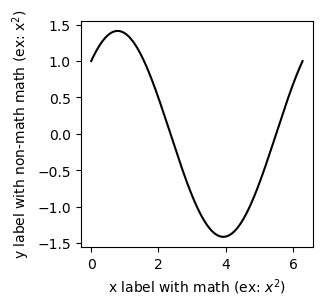

In [4]:
plt.rc('font', family='sans-serif') # These are the defaults
plt.rc('text', usetex=False)

exPlot()

### Serif Only

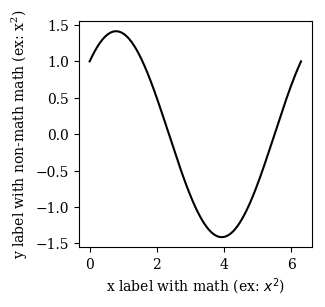

In [5]:
plt.rc('font', family='serif')
exPlot()

### LaTeX

... then reset

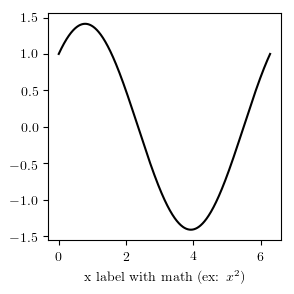

In [6]:
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
exPlot(isTeX=True)

In [7]:
plt.rc('font', family='sans-serif')
plt.rc('text', usetex=False)

## Scientific Notation

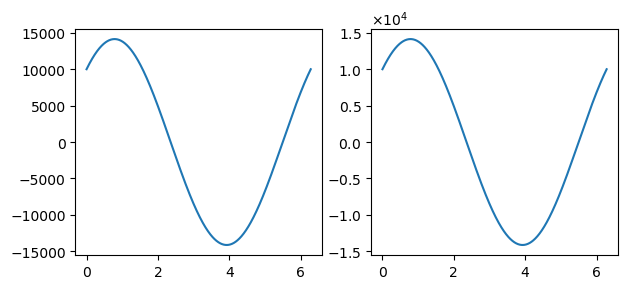

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,3),dpi=100,num=1)

# Regular
ax1.plot(x,1e4*y)

# Scientific
ax2.plot(x,1e4*y)

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1))

ax2.yaxis.set_major_formatter(formatter)

## Standard Subplots

### Adjustments

In [9]:
def subdemo(axes):
    for ii,ax in enumerate(axes.ravel()):
        ax.plot(x,10**(ii)*y,'-k')
    ax.yaxis.set_major_formatter(formatter) # Will always be the last one

#### Default

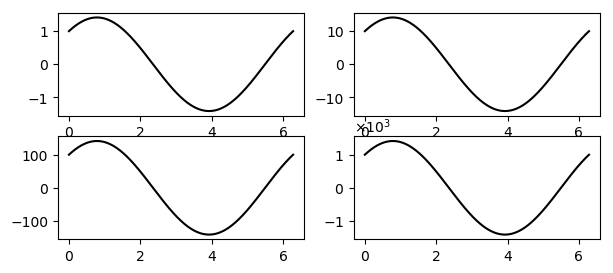

In [10]:
fig,axes = plt.subplots(2,2,figsize=(7,3),dpi=100,num=1)
subdemo(axes)

#### Automatic

This is the preffered way to do it

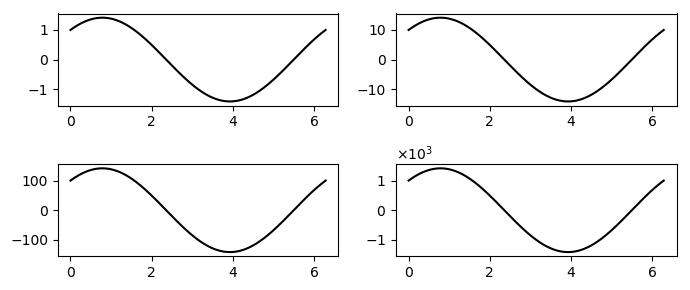

In [11]:
fig,axes = plt.subplots(2,2,figsize=(7,3),dpi=100,num=1)
subdemo(axes)
fig.tight_layout()

### Manual

This example is not designed to look good. It is to show the results.

This comes from <http://stackoverflow.com/a/6541482>

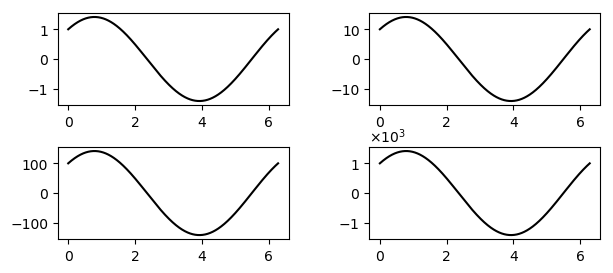

In [12]:
fig,axes = plt.subplots(2,2,figsize=(7,3),dpi=100,num=1)
subdemo(axes)

fig.subplots_adjust(hspace=0.45,wspace=0.35)

## All Options w/ examples
# left  = 0.125  # the left side of the subplots of the figure
# right = 0.9    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots

### Shared Axes

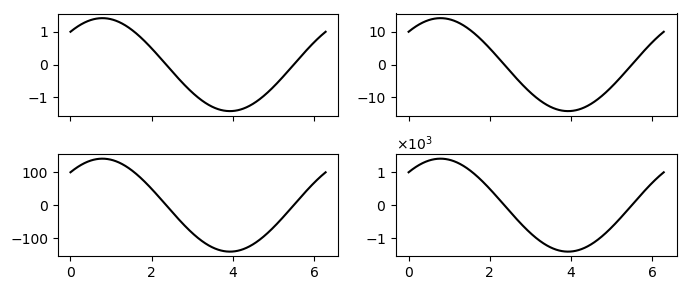

In [13]:
fig,axes = plt.subplots(2,2,figsize=(7,3),dpi=100,
                        sharex=True)
subdemo(axes)
fig.tight_layout()

You can also share the `y` axis, but it won't look good for this since they are different scales so this won't look good

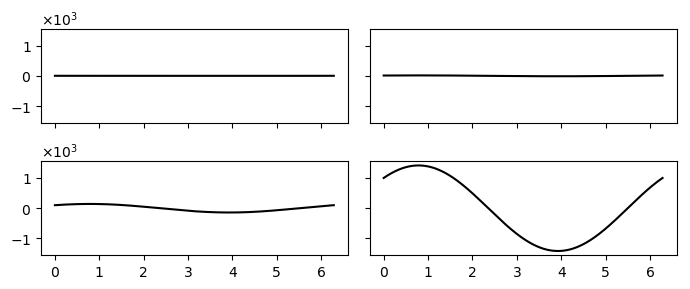

In [14]:
fig,axes = plt.subplots(2,2,figsize=(7,3),dpi=100,
                        sharex=True,sharey=True)
subdemo(axes)
fig.tight_layout()

## Fancy Subplots

There are a few ways to do this. 

* `gridspec` -- General purpose
* manually
* add subplots where you want -- doesn't have spans
    * Regular subplots and then "clear" axis

#### `gridspec`

Based on <http://matplotlib.org/users/gridspec.html>. You seem to have to rely on the `plt` tools to make all of the axes

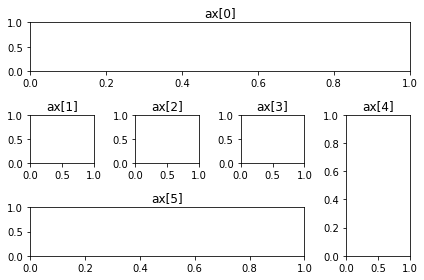

In [15]:
fig = plt.figure()

ax = [None for _ in range(6)]

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)

ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1,rowspan=2)

ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)

for ix in range(6):
    ax[ix].set_title('ax[{}]'.format(ix))

fig.tight_layout()

#### Manually

This example will be less complex to make life easier... In this case, you create the axes from the parent fig

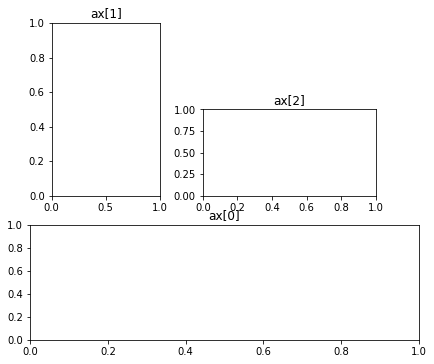

In [16]:
fig = plt.figure()

ax = [None for _ in range(3)]

ax[0] = fig.add_axes([0.1,0.1,0.9,0.4]) # Bottom
ax[1] = fig.add_axes([0.15,0.6,0.25,0.6]) # They do not *need* to be in a grid
ax[2] = fig.add_axes([0.5,0.6,0.4,0.3])

for ix in range(3):
    ax[ix].set_title('ax[{}]'.format(ix))
    
# fig.tight_layout() # does not work with this method

#### Add subplots 

Can also do grids but harder (though not impossible) to do spanning

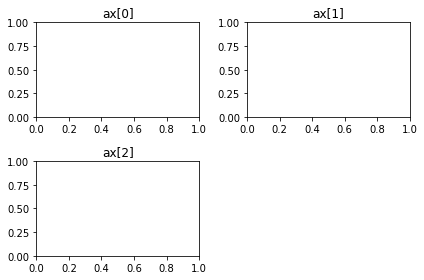

In [17]:
fig = plt.figure()

ax = [None for _ in range(3)]

ax[0] = fig.add_subplot(2,2,1)
ax[1] = fig.add_subplot(2,2,2)
ax[2] = fig.add_subplot(2,2,3)

for ix in range(3):
    ax[ix].set_title('ax[{}]'.format(ix))
    
fig.tight_layout()

#### ~~Regular plots with "cleared" axis~~

**Not Recommended**: The following code is a *bad* way to do it in comparison to the improved method following:

```python
fig,axes = plt.subplots(2,2)
ax = axes[1,1]
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

fig.tight_layout()
```

#### Regular plot with deleted axis

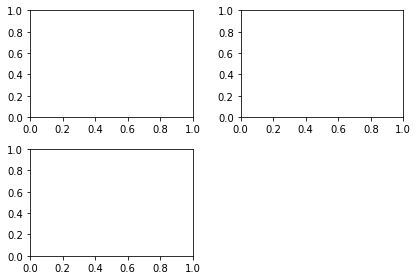

In [18]:
fig,axes = plt.subplots(2,2)
fig.delaxes(axes[1,1])
fig.tight_layout()

#### No Spacing Demo

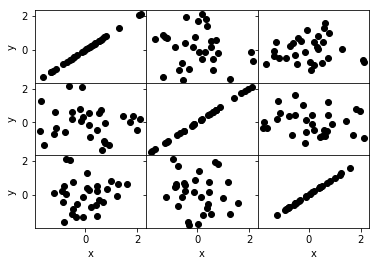

In [19]:
fig,axes = plt.subplots(3,3,sharex=True,sharey=True)

np.random.seed(282)
X = np.random.normal(size=(30,3))

import itertools
for ix,iy in itertools.product(range(3),range(3)):
    ax = axes[ix,iy]
    ax.plot(X[:,ix],X[:,iy],'ko')

for ax in axes[-1,:]:
    ax.set_xlabel('x')
for ax in axes[:,0]:
    ax.set_ylabel('y')

#fig.tight_layout(h_pad=0,w_pad=0)
fig.subplots_adjust(hspace=0,wspace=0)
        

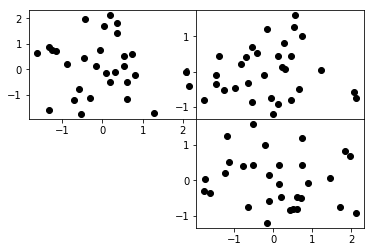

In [20]:
fig = plt.figure()

axes = []

np.random.seed(282)
X = np.random.normal(size=(30,3))

import itertools
for ii,(ix,iy) in enumerate(itertools.combinations([0,1,2],2)):
    ax = fig.add_subplot(2,2,2*ix+iy)
    ax.plot(X[:,ix],X[:,iy],'ko')
    axes.append(ax)


#fig.tight_layout(h_pad=0,w_pad=0)
fig.subplots_adjust(hspace=0,wspace=0)

## Text boxes outside axes

Basically, just make a dummy axes and add to that. Note that you may want to do `tight_layout` first

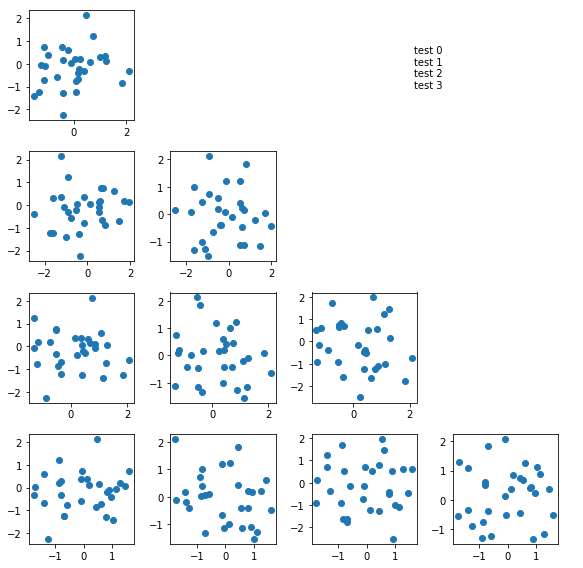

In [21]:
fig = plt.figure(figsize=(8,8))
n = 4

np.random.seed(282)
X = np.random.normal(size=(30,5))

axes = np.empty((n,n),dtype=object)
for ii in range(4):
    for jj in range(ii+1):
        axes[ii,jj] = ax = fig.add_subplot(4,4,4*ii+jj + 1)
        ax.plot(X[:,ii],X[:,jj-1],'o')

# Call tight_layout first and then add others 
fig.tight_layout()

textax = fig.add_axes([0.5, 0.8,0.5,0.15])
textax.set_frame_on(False) # uncomment this while working on it.
textax.set(xticks=[],yticks=[])

# You do not need `transform=ax.transAxes` since there is nothing there!
text = textax.text(0.5,0.5,'\n'.join('test %d'%i for i in range(4)),
                   horizontalalignment='center',verticalalignment='center', )
   
        

## Pcolor(mesh) & Colorbar (and nice colormap)

Consider the following for making a nice `pcolor`-type plots with a colorbar. The colormaps are set with `cmap=plt.cm.Spectral_r` which is the nice one from ColorBrewer

### Setup & Defaults

In [22]:
np.random.seed(362423)
A = np.random.uniform(size=(6,8))

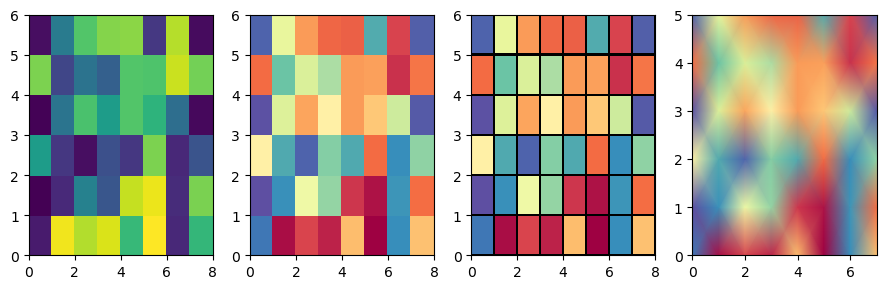

In [23]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(9,3),dpi=100)

ax1.pcolormesh(A)
ax2.pcolormesh(A,cmap=plt.cm.Spectral_r)
ax3.pcolormesh(A,cmap=plt.cm.Spectral_r,edgecolor='k')
ax4.pcolormesh(A,cmap=plt.cm.Spectral_r,shading='gouraud')
fig.tight_layout()

### Colorbars

#### Standard colorbar

The size of the figure was selected to show the problem with scale

Also, since this invokes `fig`, it doesn’t play nice with subplots

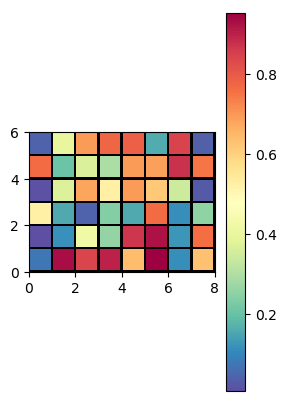

In [24]:
fig,ax = plt.subplots(1,1,figsize=(3,5),dpi=100)
pl = ax.pcolormesh(A,cmap = plt.cm.Spectral_r,edgecolor='k')
ax.axis('image')
fig.colorbar(pl)

#### Scaled Colorbar

This example scaled the colorbar. It also plays nicely with subplots (not demoed)

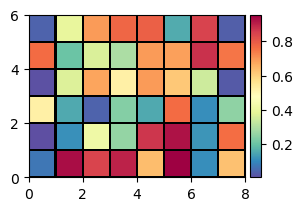

In [25]:
fig,ax = plt.subplots(1,1,figsize=(3,5),dpi=100)
pl = ax.pcolormesh(A,cmap = plt.cm.Spectral_r,edgecolor='k')
ax.axis('image')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(pl,cax=cax)

#### Set ranges

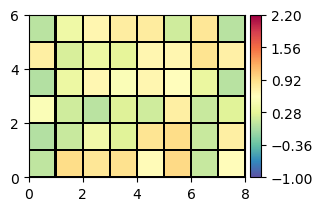

In [26]:
fig,ax = plt.subplots(1,1,figsize=(3,5),dpi=100)
pl = ax.pcolormesh(A,cmap = plt.cm.Spectral_r,edgecolor='k',vmin=-1,vmax=2.2)
ax.axis('image')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(pl,cax=cax)
cbar.set_ticks(np.linspace(-1,2.2,6))

#### Dealing with `nan` -- DEPRECATED

This may be deprecated in Python 3 and/or later versions of matplotlib (not sure) but here is how to do it for this

(0.0, 8.0, 0.0, 6.0)

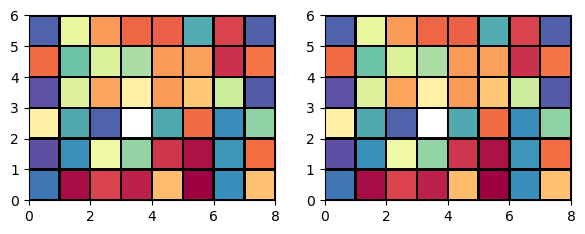

In [27]:
B = A.copy()
B[2,3] = np.nan

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,5),dpi=100)

ax1.pcolormesh(B,cmap = plt.cm.Spectral_r,edgecolor='k')
ax1.axis('image')

B = np.ma.masked_array(B,np.isnan(B))
ax2.pcolormesh(B,cmap = plt.cm.Spectral_r,edgecolor='k')
ax2.axis('image')


## Ticks

### Position

The following shows some examples of setting the tick locations


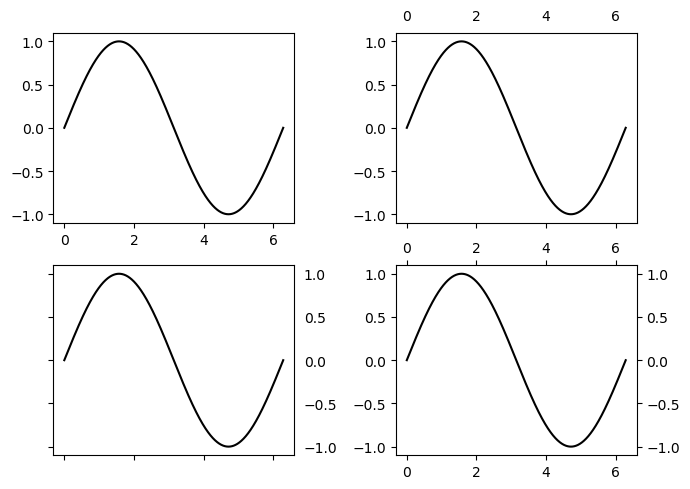

In [28]:
fig,axes = plt.subplots(2,2,figsize=(7,5),dpi=100)

X = np.linspace(0,2*np.pi,1000)
Y = np.sin(X)

for ax in axes.ravel(): #plot
    ax.plot(X,Y,'-k')

ax = axes[0,0]

ax = axes[0,1]
ax.tick_params(labeltop=True,labelbottom=False)

ax = axes[1,0]
ax.tick_params(labelright=True,labelbottom=False,labelleft=False)

ax = axes[1,1]
ax.tick_params(labeltop=True,labelbottom=True,labelright=True,labelleft=True)

# Also add ticks
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True)

fig.tight_layout()

#### All sides + inside

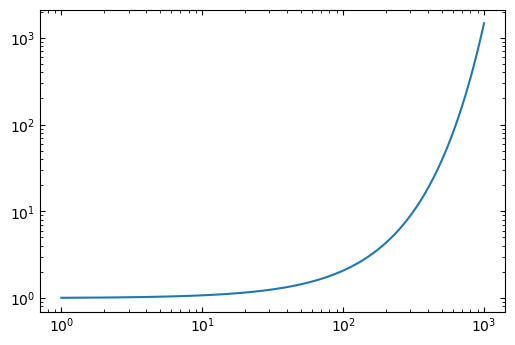

In [29]:
x = np.logspace(0,3,600)
y = 1.2**(0.04*x)
fig,ax = plt.subplots(dpi=100)
ax.plot(x,y)
ax.set(xscale='log',yscale='log')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')


#### Grids

Note that this is the same with and without a log scale but the log scale shows it better. The `zorder` makes sure the plot is in front of the grid lines

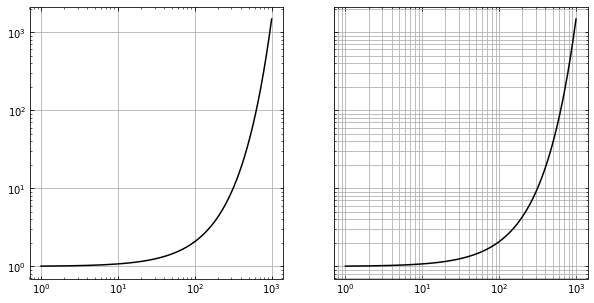

In [30]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,5))
x = np.logspace(0,3,600)
y = 1.2**(0.04*x)

for ax in (ax1,ax2):
    ax.plot(x,y,'-k')
    ax.set(xscale='log',yscale='log')
    ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both',zorder=10)
ax1.grid(which='major')
ax2.grid(which='both')

### Labels

Rotated text and `ha` (horizontal alignment)

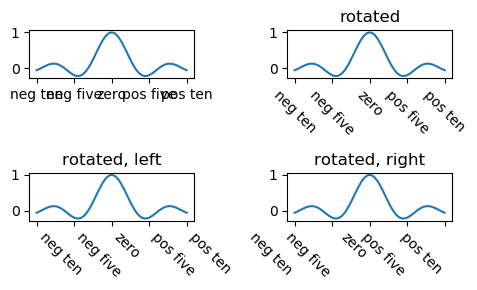

In [31]:
fig,axes = plt.subplots(2,2,figsize=(5,3),dpi=100)

x = np.linspace(-10,10,100)
y = np.sin(x)/(x + np.spacing(1))

labs = ['neg ten','neg five','zero','pos five','pos ten']

for ax in axes.ravel():
    ax.plot(x,y)
    ax.set_xticks([-10,-5,0,5,10])

axes[0,0].set_xticklabels(labs)

axes[0,1].set_xticklabels(labs,rotation=-45)
axes[0,1].set_title('rotated')

axes[1,0].set_xticklabels(labs,rotation=-45,ha='left')
axes[1,0].set_title('rotated, left')

axes[1,1].set_xticklabels(labs,rotation=-45,ha='right')
axes[1,1].set_title('rotated, right')


fig.tight_layout()

### Label Formats

Also included are prettier x-labels

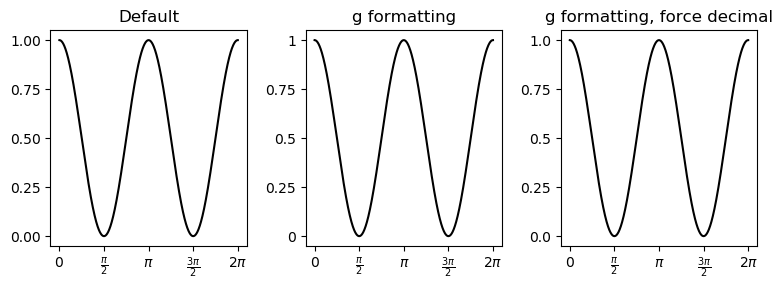

In [32]:
X = np.linspace(0,2*np.pi,1000)
Y = np.cos(X)**2

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(8,3),dpi=100,num=1)
for ax in (ax1,ax2,ax3):
    ax.plot(X,Y,'k-')
    ax.set_yticks([0, 0.25, 0.5,0.75,1])
    ax.set_xticks(np.linspace(0,2*np.pi,5))
    ax.set_xticklabels([r'$0$',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$',r'$2\pi$'])

ax1.set_title('Default')

ax2.set_title('g formatting')
ax2.set_yticklabels( ['{:0.2g}'.format(l) for l in ax2.get_yticks()] )

ax3.set_title('g formatting, force decimal')
ax3.set_yticklabels( ['{:0.2g}'.format(l) if int(l)!=float(l) else '{:0.1f}'.format(l) 
                      for l in ax3.get_yticks()] )


fig.tight_layout()

## Legends

There are a few ways to work a legend. And there is a lot more that can be found on the web.

The main takeaway is to have `label=` in the respective plot

### Directly specify

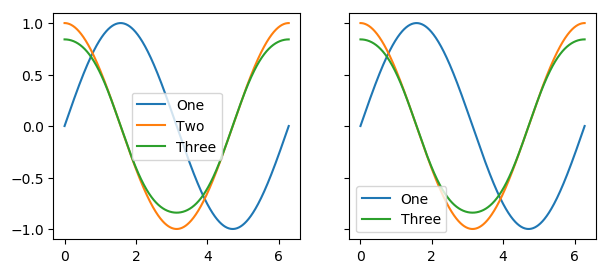

In [33]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,3),dpi=100,num=1,sharey=True)

X = np.linspace(0,2*np.pi,1000)

def plotEX(ax):
    pl = [None for i in range(3)]
    
    pl[0] = ax.plot(X,np.sin(X),label='One')
    pl[1] = ax.plot(X,np.cos(X),label='Two')
    pl[2] = ax.plot(X,np.sin(np.cos(X)),label='Three')
    return [p[0] for p in pl] # makes it just the objects
    
pl1 = plotEX(ax1) 
ax1.legend()

pl2 = plotEX(ax2) 
ax2.legend([pl2[0],pl2[2]],['One','Three'])

### Use `label`

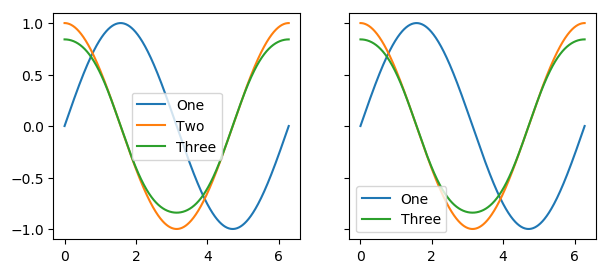

In [34]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,3),dpi=100,num=1,sharey=True)

X = np.linspace(0,2*np.pi,1000)

ax1.plot(X,np.sin(X),label='One')
ax1.plot(X,np.cos(X),label='Two')
ax1.plot(X,np.sin(np.cos(X)),label='Three')
ax1.legend()

ax2.plot(X,np.sin(X),label='One')
ax2.plot(X,np.cos(X)) # NO LABEL
ax2.plot(X,np.sin(np.cos(X)),label='Three')
ax2.legend()

### Number of points

Thankfully, the default was changed to one.

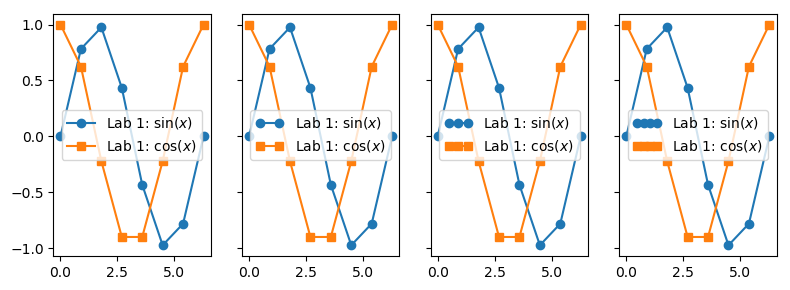

In [35]:
fig,axes = plt.subplots(1,4,figsize=(8,3),dpi=100,num=1,sharey=True)

X = np.linspace(0,2*np.pi,8)


for ii,ax in enumerate(axes):
    ax.plot(X,np.sin(X),'-o',label=r'Lab 1: $\sin(x)$')
    ax.plot(X,np.cos(X),'-s',label=r'Lab 1: $\cos(x)$')
    ax.legend(numpoints=(ii+1))
    
    
fig.tight_layout()

### Dummy Legends

This is useful if you want certain entries that are not to be plotted

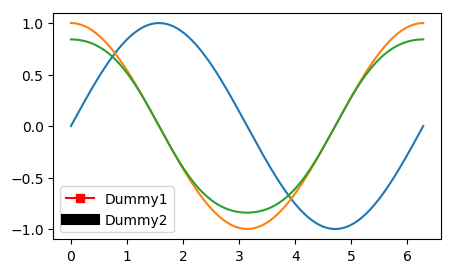

In [36]:
fig,ax = plt.subplots(1,1,figsize=(5,3),dpi=100,num=1,sharey=True)

X = np.linspace(0,2*np.pi,1000)

# Real Lines
ax.plot(X,np.sin(X),'-')
ax.plot(X,np.cos(X),'-')
ax.plot(X,np.sin(np.cos(X)),'-')

# Dummy lines
ax.plot([],'-rs',label='Dummy1')
ax.plot([],'k',label='Dummy2',LineWidth=8)
ax.legend()

### Legend in its own plot

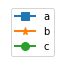

In [37]:
fig,ax = plt.subplots(1,1,figsize=(1,1))
ax.plot([],[],'-s',label='a',linewidth=2,ms=8)
ax.plot([],[],'-*',label='b',linewidth=2,ms=8)
ax.plot([],[],'-o',label='c',linewidth=2,ms=8)
ax.legend(loc='center',numpoints=1)
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()

## Plot Colors

For the most part, the default colors are fine. But there are times when you may want custom colors or to repeat colors

### Custom Colors

Can be a mix of text (e.g. `r`) and tuples/lists

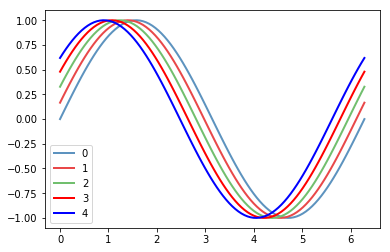

In [38]:
colors = [(0.36392156862745095, 0.5755294117647058, 0.7483921568627451),
          (0.9152941176470588, 0.2815686274509803, 0.2878431372549019),
          (0.44156862745098036, 0.7490196078431373, 0.432156862745098),
          'r',
          'b']
fig,ax = plt.subplots()
x = np.linspace(0,2*np.pi,100)
for ic,color in enumerate(colors):
    ax.plot(x,np.sin(x+ic*1.0/6),'-',color=color,linewidth=2,label=ic)
ax.legend()

### Repeat automatic colors

Note that the order of the colors hasn't changed. That is, when a color is specified, it does not change the color cycler

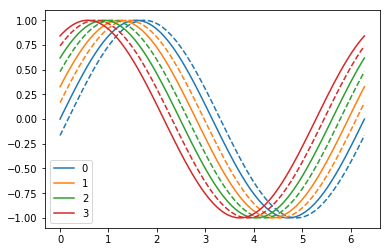

In [39]:
fig,ax = plt.subplots()
for ic in range(4):
    p = ax.plot(x,np.sin(x+ic*2.0/6),'-',label=ic)
    
    # Method one - if using this method, you do *not* need to set the `p` variable
    prev_color = ax.lines[-1].get_color()
    
    # Method 2
    assert prev_color == p[0].get_color() # This would fail it it weren't the case
    
    ax.plot(x,np.sin(x+(ic*2.0-1)/6),'--',color=prev_color)
ax.legend()

### Color of non-plot elements

This is personal preference, but sometimes it is nice to make the plot stand out by setting the color of everything else to be, for example, grey.

This demo also tries to set `z` axis (see below) but that is not needed for 2D

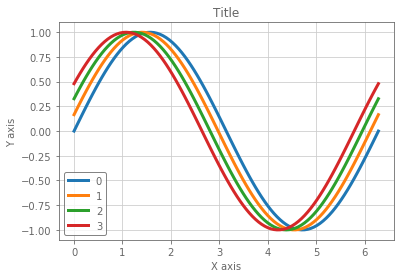

In [40]:
# Build the plot
fig,ax = plt.subplots()
ax.plot()
x = np.linspace(0,2*np.pi,100)
for ic in range(4):
    ax.plot(x,np.sin(x+ic/6),'-',LineWidth=3,label=ic)
ax.legend()
ax.grid()
ax.set(xlabel='X axis',ylabel='Y axis',title='Title')

#######
color = [0.4]*3
grid_color = [0.8]*3 # for the grid lines

if isinstance(color,(float,int)):
    color = [1.0*color]*3

# Ticks qnd labels
ax.tick_params(axis='y', colors=color)
ax.yaxis.get_offset_text().set_color(color) 
ax.yaxis.label.set_color(color)

ax.tick_params(axis='x', colors=color)
ax.xaxis.get_offset_text().set_color(color) 
ax.xaxis.label.set_color(color)

try:
    ax.tick_params(axis='z', colors=color)
    ax.zaxis.get_offset_text().set_color(color) 
    ax.zaxis.label.set_color(color)        
except:
    pass

ax.title.set_color(color)

# Legend
try:
    frame = ax.legend_.get_frame()
    frame.set_edgecolor(color)

    for text in ax.legend_.get_texts():
        text.set_color(color)
except AttributeError:
    pass # No legend

# Spines
for spine in ax.spines.values():
    spine.set_color(color) 

#Grid Lines -- Optional
for g in ax.get_xgridlines():
    g.set_color(grid_color)
for g in ax.get_ygridlines():
    g.set_color(grid_color)
try:
    for g in ax.get_zgridlines():
        g.set_color(grid_color)
except AttributeError:
    pass

# Ticks
for g in ax.get_xticklines():
    g.set_color(color)
for g in ax.get_yticklines():
    g.set_color(color)
try:
    for g in ax.get_zticklines():
        g.set_color(color)
except AttributeError:
    pass

ax.tick_params(color=color,which='minor')




### Plot color palettes

This is just an example function to plot color pallets. Useful when playing with colormaps

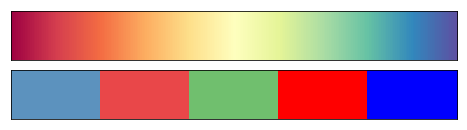

In [41]:
def palette_plot(pal,ax=None,autofig=False):
    """
    Plot the color palette specified. Note that this is adopted from the
    seaborn.palplot function

    Inputs:
    -------
    pal 
        colormap or list of colors to show
    
    Options:
    --------
    ax [plt.gca() or created]
        Axis on which to plot the colormap. See autofig below
    
    autofig [False]
        If true and ax is not specified, will make a new figure with
        a size more conducive to palette plots
    """

    if ax is None: # Make the 
        if autofig:
            fig,ax = plt.subplots(1, 1, figsize=(8,1))
        else:
            ax = plt.gca()
    
    if not isinstance(pal,mpl.colors.Colormap):
        pal = mpl.colors.ListedColormap(list(pal))
    
    n = 256
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=pal,interpolation="nearest", aspect="auto")
    ax.set(xticks=[],yticks=[],xticklabels=[],yticklabels=[])
    
fig,axes = plt.subplots(2,1,figsize=(8,2))

# A colormap
palette_plot(plt.cm.Spectral,ax=axes[0])

# A list of colors
colors = [(0.36392156862745095, 0.5755294117647058, 0.7483921568627451),
          (0.9152941176470588, 0.2815686274509803, 0.2878431372549019),
          (0.44156862745098036, 0.7490196078431373, 0.432156862745098),
          'r',
          'b']
palette_plot(colors,ax=axes[1])


### Color Manipulation

This is just helpful to manipulate different colors. I am not 100% sure if this math correctly follows color theory

In [42]:
def brighten(color,frac=0.9):
    """
    Brighten (tint) color
    
    0 is white, 1 is no change
    """
    color = np.array(color,dtype=float)
    color = color * frac + (1.0-frac)    
    return color.tolist()
    
def darken(color,frac=0.1):
    """
    Darken (shade) color.
    
    1 is black, 0 is no change
    """
    color = np.array(color,dtype=float)
    color = color * (1.0-frac)    
    return color.tolist()

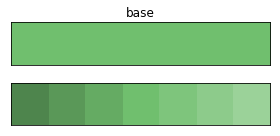

In [43]:
base = (0.44156862745098036, 0.7490196078431373, 0.432156862745098)
darker = [darken(base,f) for f in [0.3,0.2,0.1]]
brighter = [brighten(base,f) for f in [0.9,0.8,0.7]]

fig,axes = plt.subplots(2,1,figsize=(4,2))
palette_plot([base],ax=axes[0])
palette_plot(darker + [base] + brighter,ax=axes[1])

axes[0].set_title('base')
fig.tight_layout()

## Multiple y-axes

The first example is mine. The second is taken *nearly* verbatim from <http://stackoverflow.com/a/7734614>

I will experiment a little with combining scientific notation as well as log scales but I won't go too crazy (until I have to do it at which point, I will update this)

### Double y-axis

**NOTE**: The keyword for `tick_params` is `colors` (with an **s**)

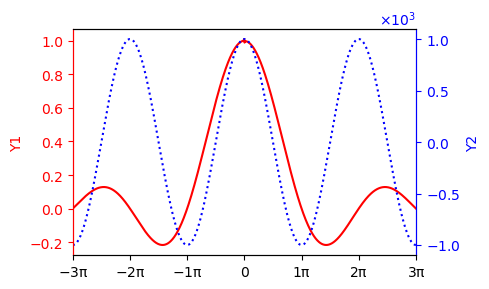

In [44]:
fig, ax1 = plt.subplots(1,1,figsize=(5,3),dpi=100)

X = np.linspace(-3*np.pi,3*np.pi,1000)
Y1 = np.sin(X)/(X+0.0001)
Y2 = 1e3 * np.cos(X)
Y3 =  np.exp(np.abs(X))

# Twin the axis
ax2 = ax1.twinx()

# Plotting
ax1.plot(X,Y1,'-r')
ax2.plot(X,Y2,':b')

# Color the axis and add labels
ax1.set_ylabel('Y1',color='r')
ax2.set_ylabel('Y2',color='b')

ax1.tick_params(axis='y', colors='r')
ax2.tick_params(axis='y', colors='b')

# Set the spine colors. Really only need to do ax2 since that is on top
# but this just makes 100% sure
for ax in (ax1,ax2):
    ax.spines['left'].set_color('r')
    ax.spines['right'].set_color('b')

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax2.yaxis.set_major_formatter(formatter)
ax2.yaxis.get_offset_text().set_color('b') # Set the color of the power

# Better X-Ticks
ax1.set_xlim((X.min(),X.max()))
ax1.set_xticks(np.arange(-3,4)*np.pi)
xticklabs = [r'$\mathregular{{{0:d}\pi}}$'.format(i) for i in np.arange(-3,4)]; xticklabs[3]='0'
ax1.set_xticklabels(xticklabs) 

fig.tight_layout()

### Triple y-axis

Again, this is inspired by <http://stackoverflow.com/a/7734614> but I make a few changes

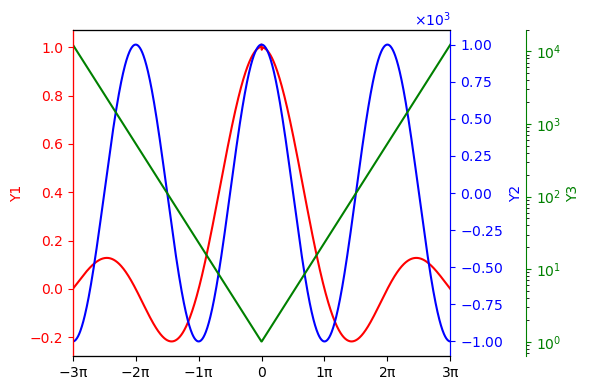

In [45]:
fig, ax1 = plt.subplots(1,1,figsize=(6,4),dpi=100)

# Twin the x-axis twice to make independent y-axes.
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
ax3.spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
ax3.set_frame_on(True)
ax3.patch.set_visible(False)

# Plot
ax1.plot(X,Y1,'-r')
ax2.plot(X,Y2,'-b')
ax3.plot(X,Y3,'-g')

colors = ['r','b','g']
axes = [ax1,ax2,ax3]
names = ['Y1','Y2','Y3']

for ax in (ax1,ax2,ax3):
    ax.spines['left'].set_color(colors[0])
    ax.spines['right'].set_color(colors[1])
ax3.spines['right'].set_color('g') # reset
    
for ax,color,name in zip(axes,colors,names):
    ax.set_ylabel(name,color=color)
    ax.tick_params(axis='y', colors=color)

# Nicer ax2 y axis
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax2.yaxis.set_major_formatter(formatter)
ax2.yaxis.get_offset_text().set_color('b') # Set the color of the power

# Set ax3 to log
ax3.set_yscale('log')

# Better X-Ticks
ax1.set_xlim((X.min(),X.max()))
ax1.set_xticks(np.arange(-3,4)*np.pi)
xticklabs = [r'$\mathregular{{{0:d}\pi}}$'.format(i) for i in np.arange(-3,4)]; xticklabs[3]='0'
ax1.set_xticklabels(xticklabs)

fig.tight_layout()


## 3D Data

In [46]:
X1,X2 = np.meshgrid(*[np.linspace(-1,1,100)]*2)
F = (1.0 + (1.0/3.0)/(2.0 * X1 + X2 + 7.0/2.0) ) * np.exp(- (0.5 * (X2-1.0/5.0) * (X1 + 1.0))**2)

def _set_axis(ax,z=True):
    r =0.01
    if z:
        ax.set_zlim([0.25, 1.67])
    ax.set_xlim([-1-2*r, 1+2*r])
    ax.set_ylim([-1-2*r, 1+2*r])
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    ax.set_aspect('equal')

### Countour


`contourf` does *not* include the lines so it is helpful to set them yourself.


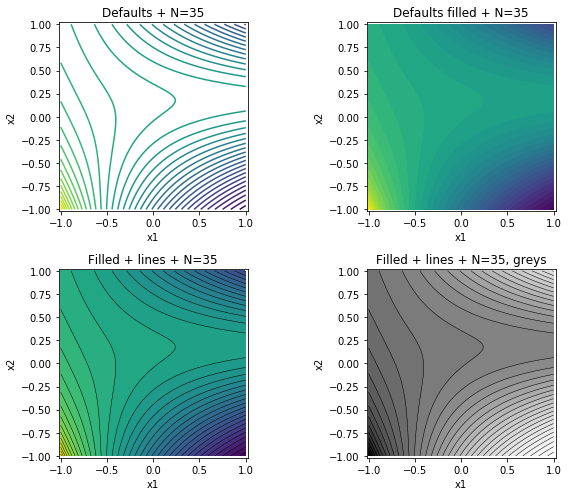

In [47]:
fig,axes = plt.subplots(2,2,figsize=(9,7))

axes[0,0].contour(X1,X2,F,35)
axes[0,0].set_title('Defaults + N=35')

axes[0,1].contourf(X1,X2,F,35)
axes[0,1].set_title('Defaults filled + N=35')

axes[1,0].contourf(X1,X2,F,35)
axes[1,0].contour(X1,X2,F,35,colors='k',linewidths =0.5 )
axes[1,0].set_title('Filled + lines + N=35')

axes[1,1].contourf(X1,X2,F,35,cmap=plt.cm.Greys)
axes[1,1].contour(X1,X2,F,35,colors='k',linewidths =0.5 )
axes[1,1].set_title('Filled + lines + N=35, greys')

for ax in axes.ravel():
    _set_axis(ax,z=False)

fig.tight_layout()

#### Colorbar

Same as above

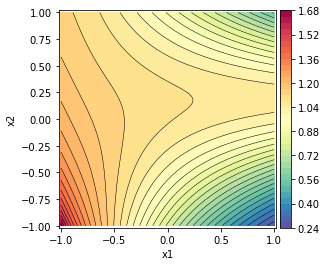

In [48]:
fig,ax = plt.subplots()
obj = ax.contourf(X1,X2,F,35,cmap=plt.cm.Spectral_r)
ax.contour(X1,X2,F,35,colors='k',linewidths =0.5 )

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(obj,cax=cax)

_set_axis(ax,z=False)

### Surface Plots

Unlike Matlab, there is nothing wrong with setting your grid with a lot of points. You then use `cstride` and `rstride` to control that. In this example, I set with 100 points but use `cstride=4` to only plot a line every 4 spaces and `rstride=3` to plot a line every 3 in the other direction

Must include the following to import `Axes3D`

In [49]:
from mpl_toolkits.mplot3d import Axes3D

#### Default

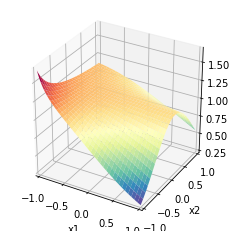

In [50]:
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_surface(X1,X2,F,rstride=4,cstride=3,cmap=plt.cm.Spectral_r)
_set_axis(ax)

#### Wiremesh

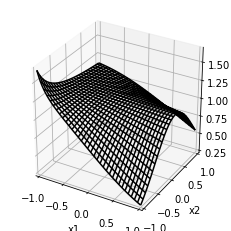

In [51]:
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_wireframe(X1,X2,F,rstride=4,cstride=3,color='k')
_set_axis(ax)

#### Wiremesh + contour + white panes

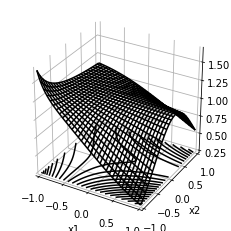

In [52]:
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')

# White edges
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 

SF = ax.plot_wireframe(X1,X2,F,rstride=4,cstride=3,color='k')
CS = ax.contour(X1,X2,F,25,zdir='z',offset=0.25, colors='k')
_set_axis(ax)

#### All together + rotation + colorbar

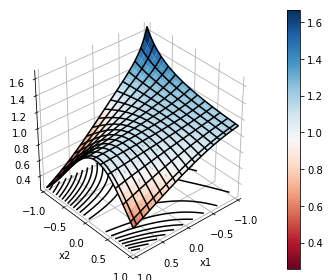

In [53]:
cmap=plt.cm.RdBu
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_surface(X1,X2,F,rstride=4,cstride=3,cmap=cmap)
SF = ax.plot_wireframe(X1,X2,F,rstride=8,cstride=6,color='k')
CS = ax.contour(X1,X2,F,25,zdir='z',offset=0.25, colors='k')

# Colorbar
m = plt.cm.ScalarMappable(cmap=cmap)
m.set_array(F)
fig.colorbar(m)

# Rotate
ax.view_init(35,49)

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 

_set_axis(ax)
fig.tight_layout()

#### Interactive

This shows how to do the plots interactive by changing 

    %matplotlib inline
   
to

    %matplotlib qt

But it is to be commented out in the main one.

It may need to be run twice...

```python
%matplotlib qt
#%matplotlib inline
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_wireframe(X1,X2,F,rstride=4,cstride=3,color='k')
_set_axis(ax)
```

## Violin Plots

Pretty rudimentary for now

[Text(0, 0, 'uniform'),
 Text(0, 0, 'normal'),
 Text(0, 0, 'beta'),
 Text(0, 0, 'gamma')]

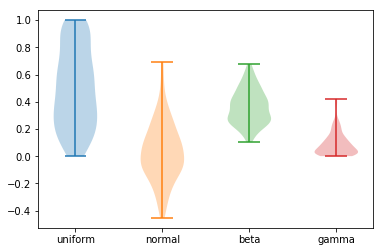

In [54]:
from collections import OrderedDict
samples = OrderedDict()
np.random.seed(100)

samples['uniform'] = np.random.uniform(size=200)
samples['normal'] = np.random.normal(size=200,scale=0.2)
samples['beta'] = np.random.beta(a=5,b=9,size=200)
samples['gamma'] = np.random.gamma(1,size=200,scale=0.1)

fig,ax = plt.subplots()

for ii,x in enumerate(samples.values()):
    ax.violinplot(x,positions=[ii])
    
ax.set_xticks(np.arange(len(samples)))
ax.set_xticklabels(list(samples.keys()))


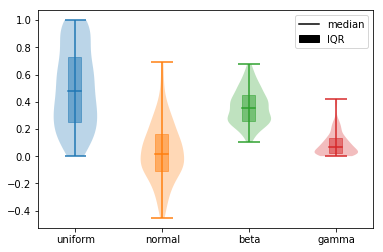

In [55]:
fig,ax = plt.subplots()

for ii,x in enumerate(samples.values()):
    vp = ax.violinplot(x,positions=[ii])
    color = vp['cbars'].get_color()[0]
    
    #plot the IQR
    w = 0.075
    xx = ii + np.array([-1,1])*w - 0.005
    ax.fill_between(xx,*np.percentile(x,[25,75]),color=color,alpha=0.5)
    
    # These can also be done by ax.violinplot
    ax.plot(xx,[np.median(x)]*2,'-',color=color)
ax.set_xticks(np.arange(len(samples)))
ax.set_xticklabels(list(samples.keys()))

ax.fill_between([],[],color='k',label='IQR')
ax.plot([],[],color='k',label='median')
ax.legend()

## Patches & hatches

This discussion is largly taken from <http://matthiaseisen.com/pp/patterns/p0203/>

### Simple patch object

(again, see link above)

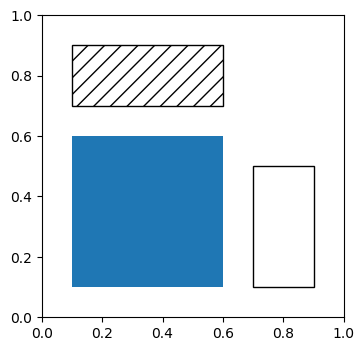

In [56]:
fig,ax = plt.subplots(1,1,figsize=(1.62*4,4),dpi=100,num=1)
ax.add_patch(
    mpl.patches.Rectangle(
        (0.1, 0.1),   # (x,y)
        0.5,          # width
        0.5,          # height
    )
)
ax.add_patch(
    mpl.patches.Rectangle((0.7,0.1),0.2,0.4,fill=False)
    )
ax.add_patch(
    mpl.patches.Rectangle((0.1,0.7),0.5,0.2,fill=False,hatch='//')
    )
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_aspect('equal')

### Hatch Demos

Below are many types of hatches. From the [documentation](http://matplotlib.org/api/collections_api.html#matplotlib.collections.Collection.set_hatch) only notes:

```
/   - diagonal hatching
\   - back diagonal
|   - vertical
-   - horizontal
+   - crossed
x   - crossed diagonal
o   - small circle
O   - large circle
.   - dots
*   - stars
```

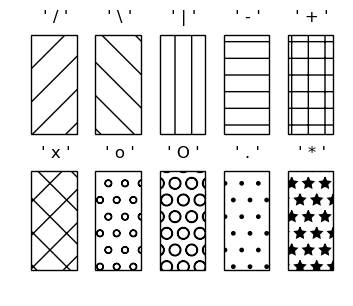

In [57]:
hatches = ['/','\\','|','-','+','x','o','O','.','*']
fig,axes = plt.subplots(2,5,figsize=(4,3.3),dpi=100,num=1)

def plotHatch(ax,hatch):
    ax.add_patch(mpl.patches.Rectangle((0.05,0.05),0.85,1.85,fill=False,hatch=hatch))
    ax.set_xlim((0,1))
    ax.set_ylim((0,2))
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(r"' {:s} '".format(hatch))

for hatch,ax in zip(hatches,axes.ravel()):
    plotHatch(ax,hatch)

#### Double, Triple, etc

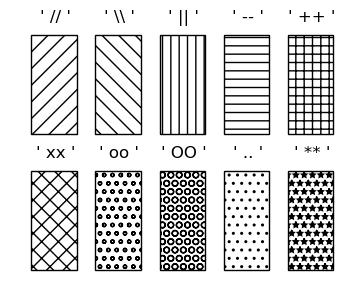

In [58]:
fig,axes = plt.subplots(2,5,figsize=(4,3.3),dpi=100,num=1)
for hatch,ax in zip(hatches,axes.ravel()):
    plotHatch(ax,hatch*2)


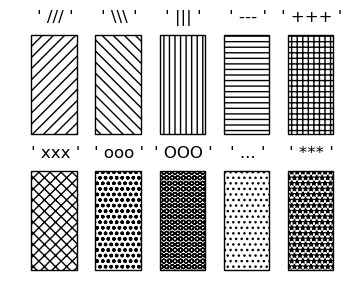

In [59]:
fig,axes = plt.subplots(2,5,figsize=(4,3.3),dpi=100,num=1)
for hatch,ax in zip(hatches,axes.ravel()):
    plotHatch(ax,hatch*3)

### Hatch filled plots

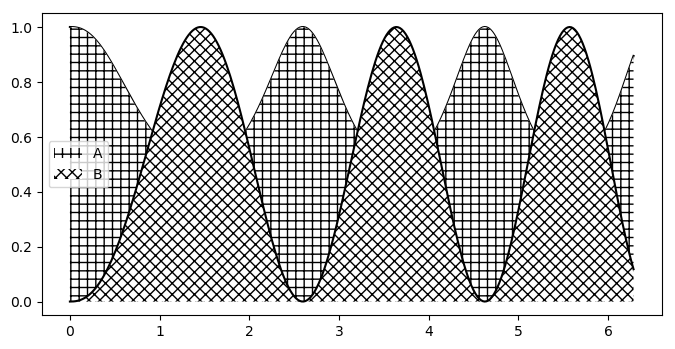

In [60]:
fig,ax = plt.subplots(1,1,figsize=(8,4),dpi=100)
X = np.linspace(0,2*np.pi,300)
Y = np.sin(X**1.2)**2

ax.plot(X,1.0/(Y+1),'-k',zorder=-10) # Set behind by using zorder
ax.plot(X,Y,'-k',zorder=2)

ax.fill_between(X,1.0/(Y+1),hatch='++',facecolor='w',label='A')
ax.fill_between(X,Y,hatch='xxx',facecolor='w',label='B')
ax.legend()

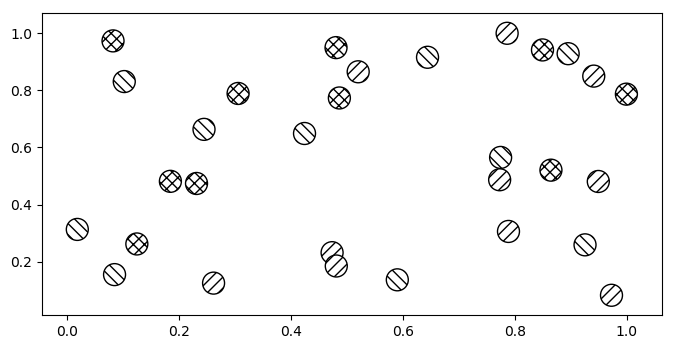

In [61]:
fig,ax = plt.subplots(1,1,figsize=(8,4),dpi=100)
np.random.seed(28832)
X = np.random.uniform(size=(10,4))
ax.scatter(X[:,0],X[:,1],s=250,color='w',edgecolors='k',hatch='xxx')

ax.scatter(X[:,1],X[:,0],s=250,color='w',edgecolors='k',hatch='///')
ax.scatter(X[:,2],X[:,3],s=250,color='w',edgecolors='k',hatch='\\\\\\')

## Inset Plots, Etc

There are many ways to do inset plots. I will demo a few here

### Built In Tools

The following demos using a built in tool: `mpl_toolkits.axes_grid1.inset_locator.inset_axes`

The whole thing is not well documented, but I followed the inheretance up to `mpl_toolkits.axes_grid1.inset_locator.AnchoredOffsetbox`. From that, I got the following location guides:

    'upper right'  : 1,
    'upper left'   : 2,
    'lower left'   : 3,
    'lower right'  : 4,
    'right'        : 5,
    'center left'  : 6,
    'center right' : 7,
    'lower center' : 8,
    'upper center' : 9,
    'center'       : 10,
    
See [AxesGrid toolkit Overview](http://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html#insetlocator)

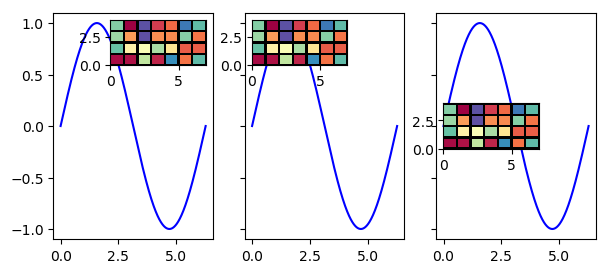

In [62]:
from mpl_toolkits.axes_grid1 import inset_locator
X = np.linspace(0,2*np.pi,1000)
np.random.seed(47344)
A = np.random.uniform(size=(4,7))

fig,axes = plt.subplots(1,3,figsize=(7,3),dpi=100,sharey=True)

locs = [1,2,6]

ax_minis = []
for ax,loc in zip(axes,locs): 
    ax.plot(X,np.sin(X),'-b')
    
    ax_mini = inset_locator.inset_axes(ax,width='60%',height='20%',loc=loc)
    
    ax_mini.pcolormesh(A,cmap = plt.cm.Spectral_r,edgecolor='k')
    ax_minis.append(ax_mini) # Smart to save it 

# The following will fail with this
# fig.tight_layout()

### Alternative

The general alternative is to use `fig.add_axes` and manually set all that is needed. See also <http://stackoverflow.com/a/17479417> 

## Bar Charts

See the below example for how to make multiple bar charts. 

Note that the width is decided based on the numbers

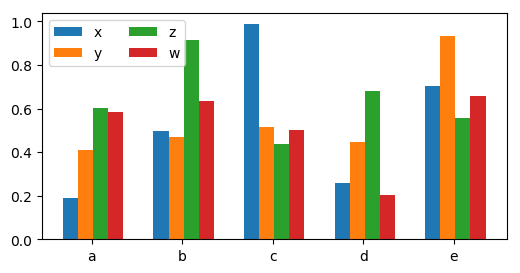

In [63]:
fig,ax = plt.subplots(1,1,figsize=(6,3),dpi=100,num=1)

Nbins = 5
Nbars = 4 # Number of bars (items) per bin

width = 1.0 /(Nbars+2)
ind = np.arange(Nbins)

# generate random data for now
np.random.seed(44328)
Data = [np.random.uniform(size=Nbins) for i in range(Nbars)] # (Nbars, Nbins)
labels = ['x','y','z','w']

for ii,dat_item in enumerate(Data):
    ax.bar(ind + (ii+1)*width,dat_item,width,label=labels[ii])

ax.set_xticks(ind + 2.0 /(Nbins + (1 if Nbars == 1 else 0)))
ax.set_xticklabels(['a','b','c','d','e'])
ax.legend(loc=2,ncol=2)    
    

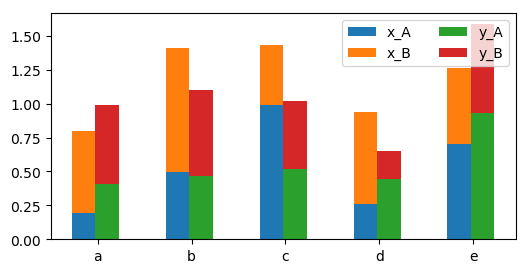

In [64]:
fig,ax = plt.subplots(1,1,figsize=(6,3),dpi=100,num=1)

Nbins = 5
Nbars = 2 # Number of bars (items) per bin

width = 1.0 /(Nbars+2)
ind = np.arange(Nbins)

# generate random data for now
np.random.seed(44328)
DataA = [np.random.uniform(size=Nbins) for i in range(Nbars)] # (Nbars, Nbins)
DataB = [np.random.uniform(size=Nbins) for i in range(Nbars)] # (Nbars, Nbins)

labels = ['x','y']

for ii,(datA,datB) in enumerate(zip(DataA,DataB)):
    ax.bar(ind + (ii+1)*width,datA,width,label=labels[ii] + '_A')
    ax.bar(ind + (ii+1)*width,datB,width,bottom=datA,label=labels[ii] + '_B')
    
ax.set_xticks(ind + 2.0 /(Nbins + (1 if Nbars == 1 else 0)))
ax.set_xticklabels(['a','b','c','d','e'])
ax.legend(loc='best',ncol=2) 

## Fancy Boxes

These come directly from <http://stackoverflow.com/a/17087794>

> The last two are "Fancy" bbox patches, so the padding, etc is set in a different manner. (Which is rather annoying for simple things like padding, though it makes the implementation simpler behind-the-scenes.)

Text(0.5, 0.2, 'Test')

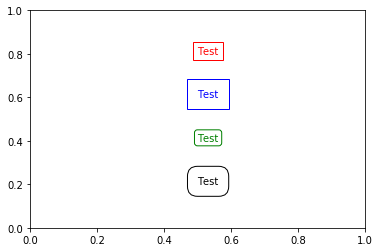

In [65]:
fig, ax = plt.subplots()

ax.text(0.5, 0.8, 'Test', color='red', 
        bbox=dict(facecolor='none', edgecolor='red'))
ax.text(0.5, 0.6, 'Test', color='blue', 
        bbox=dict(facecolor='none', edgecolor='blue', pad=10.0))
ax.text(0.5, 0.4, 'Test', color='green', 
        bbox=dict(facecolor='none', edgecolor='green', 
                  boxstyle='round'))
ax.text(0.5, 0.2, 'Test', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', 
                  boxstyle='round,pad=1'))

## Contours of scattered Data

Two ways to contour scattered data

Text(0.5, 1.0, 'tricontourf')

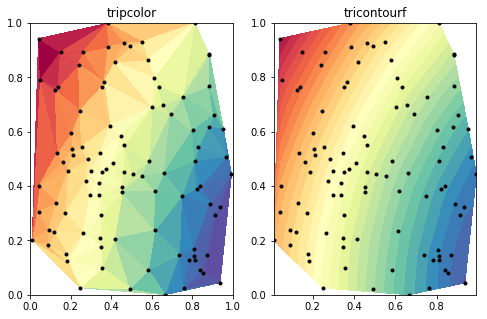

In [66]:
np.random.seed(1002)
N = 100
X = np.random.uniform(size=N)
Y = np.random.uniform(size=N)

Z = np.sin(X) + np.cos(Y)

fig,axes = plt.subplots(1,2,figsize=(8,5))

cmap = plt.cm.Spectral

ax = axes[0]
ax.tripcolor(X,Y,Z,cmap=cmap)
ax.plot(X,Y,'.k')
ax.set_title('tripcolor')
ax.set_xlim([0,1]); ax.set_ylim([0,1])

ax = axes[1]
ax.tricontourf(X,Y,Z,30,cmap=cmap)
ax.plot(X,Y,'.k')
ax.set_title('tricontourf')


(0, 1)

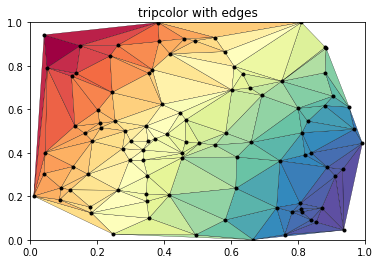

In [67]:
fig,ax = plt.subplots(1,1)
ax.tripcolor(X,Y,Z,cmap=plt.cm.Spectral,edgecolor='k')
ax.plot(X,Y,'.k')
ax.set_title('tripcolor with edges')
ax.set_xlim([0,1]); ax.set_ylim([0,1])

### Surface of scattered data

Just like the other surface plots, you need:

In [68]:
from mpl_toolkits.mplot3d import Axes3D

#### Interpolate

Note that values outside the convex hull will be `nan` and you will get warnings. Also, set the `vmin` and `vmax` since they mess it up. Use the `Z` and not `z` since `z` has the `nan`

This will also have some odd cases around the edges since it tries to connect them

/Users/jgwinok/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/Users/jgwinok/anaconda2/envs/py3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


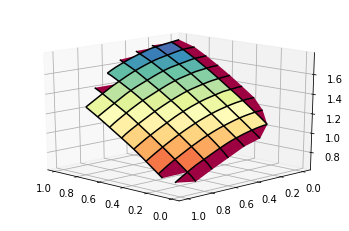

In [69]:
import scipy.interpolate
x,y = np.meshgrid(np.linspace(X.min(),X.max(),30),
                  np.linspace(Y.min(),Y.max(),30))
xy = np.vstack((x.ravel(),y.ravel())).T
z = scipy.interpolate.griddata(np.vstack([X,Y]).T,Z,xy)
z = z.reshape(x.shape)

fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(  x,y,z,rstride=4,cstride=3,cmap=plt.cm.Spectral,vmin=Z.min(),vmax=Z.max())
ax.plot_wireframe(x,y,z,rstride=4,cstride=3,color='k')

ax.view_init(17,135)

#### Triangulate

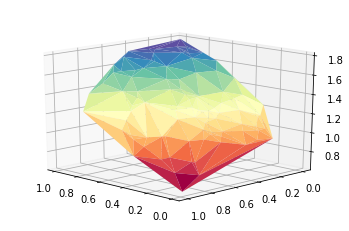

In [70]:
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
ax.plot_trisurf(X,Y,Z,cmap=plt.cm.Spectral)

ax.view_init(17,135)

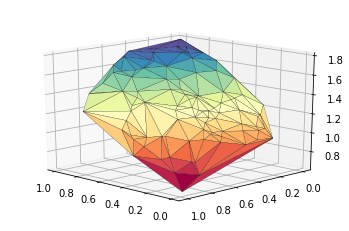

In [71]:
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
surf = ax.plot_trisurf(X,Y,Z,cmap=plt.cm.Spectral,linewidth=0.2)

surf.set_edgecolor('k')

ax.view_init(17,135)

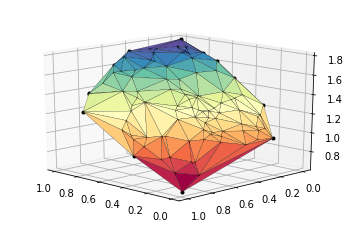

In [72]:
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
surf = ax.plot_trisurf(X,Y,Z,cmap=plt.cm.Spectral,linewidth=0.2)

surf.set_edgecolor('k')
ax.plot3D(X,Y,Z,'ok',MarkerSize=3)

ax.view_init(17,135)

## Scaled Colors

### Lines

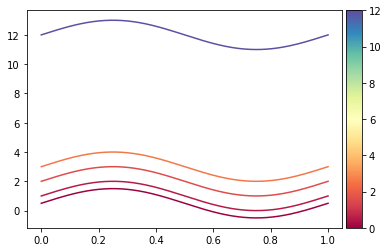

In [73]:
X = np.linspace(0,1,1000);

cmap = plt.cm.Spectral
vals = np.array([0.5,1,2,3,12])
vals01 = (vals - vals.min()) / (vals.max() - vals.min())

colors = cmap(vals01)

fig,ax = plt.subplots()

# Fake a color bar
pcf = ax.pcolormesh([[0,12],[12,0]],cmap=cmap,vmin=0,vmax=12)
ax.clear()

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(pcf,cax=cax)

# Now plot
for color,val in zip(colors,vals):
    ax.plot(X,np.sin(2*np.pi*X)+val,'-',color=color)

### Filled 

Presented below are two different ways to do this. The first is **better** but I show the other as well. The first way doesn't require as much fiddling with the inputs and will handle expansion better.

Notice there is a non-linear scaling

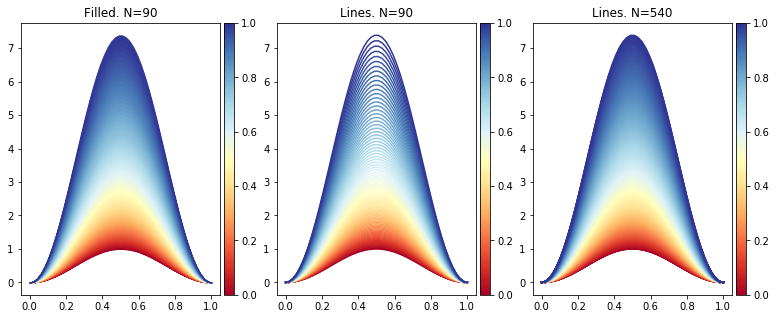

In [74]:
cmap = plt.cm.RdYlBu

X = np.linspace(0,1,50)
fun = lambda n: (np.exp(2*n))*0.5*(1-np.cos(X*2*np.pi))

fig,axes = plt.subplots(1,3,figsize=(13,5))

########### Fake a color bar
pcf = axes[2].pcolormesh([[0,1],[1,0]],cmap=cmap,vmin=0,vmax=1)
axes[2].clear()

############################### Better way
N = 90
ax = axes[0]
for ii in range(N-1):
    n0 = 1.0*ii/(N-1)
    n1 = 1.0*(ii+1)/(N-1)
    nc = 1.0*ii/(N-2) # color SHould be in [0,1]
    
    ax.fill_between(X,fun(n0),fun(n1),color=cmap(nc))

    ax.set_title('Filled. N={}'.format(N))
    
############################### Alternative. Have to be careful about spacing
for ax,N2 in zip(axes[1:],[N,6*N]):
    for ii in range(N2):
        n = 1.0*ii/(N2-1)
        ax.plot(X,fun(n),'-',color=cmap(n))
        ax.set_title('Lines. N={}'.format(N2))
#fig.colorbar(pcf)
############################ Colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
for ax in axes:
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(pcf,cax=cax)

## Styles

You can also use some of the built-in styles or custom ones

If you have your styles as a text file, then it should look something like 

```
# comment
xtick.direction : in
xtick.major.size : 3
```

while the same thing as a dictionary is:

```
{'xtick.direction': 'in',
 'xtick.major.size': 3}
```


In [75]:
X = np.linspace(0,2*np.pi,100)
Y1 = np.sin(X)
Y2 = np.sin(X**2)

Below is my preferred style. This was heavily inspired by [`plot-figure`](https://github.com/garrettj403/SciencePlots/blob/master/examples/plot-figure.py) (especially for some of the tick settings

This example also uses the context-manager version

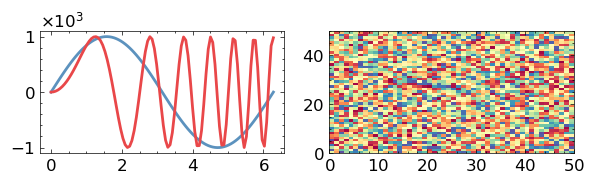

In [76]:
mystyle = """\
figure.figsize : 6,4

# Line Colors
# These are based on cbrewer with some modifications
axes.prop_cycle    : cycler('color',['5c92be','e94749','70bf6e','ff9832',\
                                     'ac71b5','b77752','f89acb','adadad','d7c78f'])
# Map colors
image.cmap   : Spectral_r

# Set x axis
xtick.direction : in
xtick.major.size : 3
xtick.major.width : 0.5
xtick.minor.size : 1.5
xtick.minor.width : 0.5
xtick.minor.visible :   True
xtick.top : True

# Set y axis
ytick.direction : in
ytick.major.size : 3
ytick.major.width : 0.5
ytick.minor.size : 1.5
ytick.minor.width : 0.5
ytick.minor.visible :   True
ytick.right : True

# Set line widths
axes.linewidth : 0.5
grid.linewidth : 0.5
lines.linewidth : 2

# Always save as 'tight'
savefig.bbox : tight
savefig.pad_inches : 0.05

# Use serif fonts
# font.serif : Times New Roman
# font.family : serif
font.size : 12

axes.formatter.limits : -3, 3       # When to use scientific notation
axes.formatter.use_mathtext : True  # False:1e6 vs True: 1 \times 10^6

# Always fig.tight_layout() 
# (commented out since it breaks some things. Do it manually)
#figure.autolayout: True   
"""
import tempfile
with tempfile.NamedTemporaryFile(delete=False) as F:
    F.write(mystyle.encode('utf8'))

with plt.style.context(F.name,after_reset=True):
    fig,axes = plt.subplots(1,2,figsize=(6,2),num=ii)
    axes[0].plot(X,1e3*Y1,label='Y1')
    axes[0].plot(X,1e3*Y2,label='Y2')
    
    np.random.seed(1)
    R = np.random.uniform(size=(50,50))
    axes[1].pcolormesh(R)
    
    fig.tight_layout()

/Users/jgwinok/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/jgwinok/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/jgwinok/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure

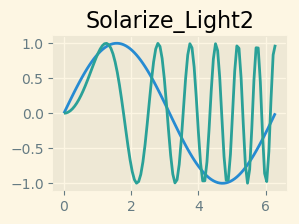

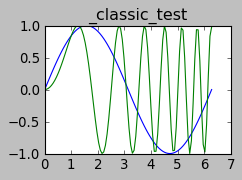

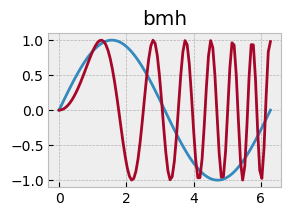

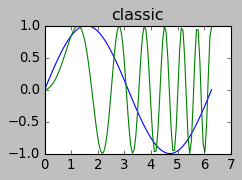

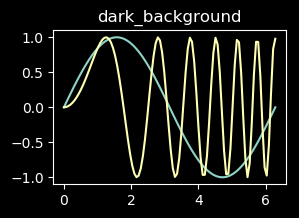

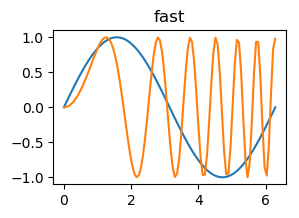

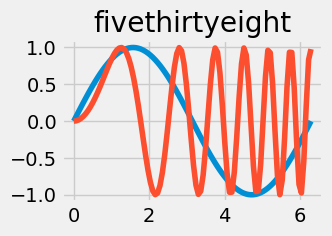

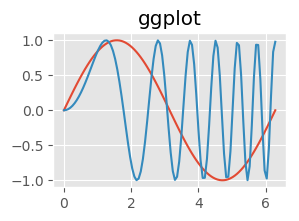

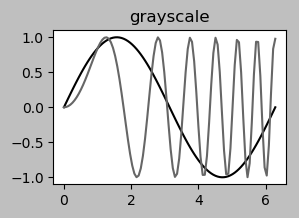

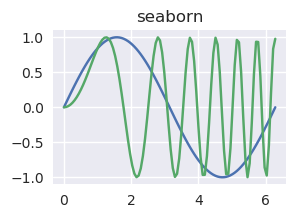

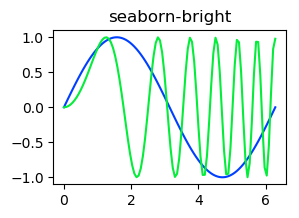

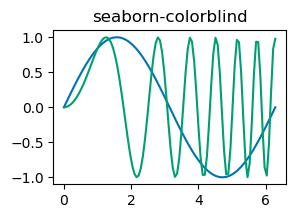

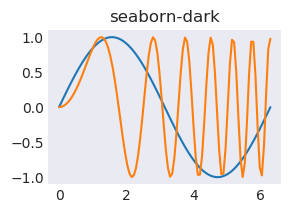

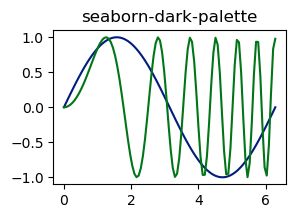

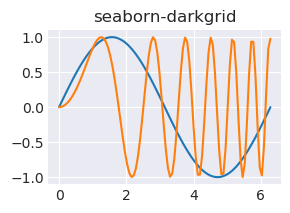

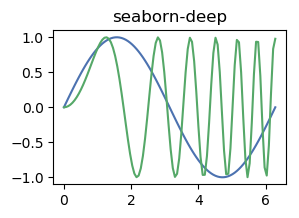

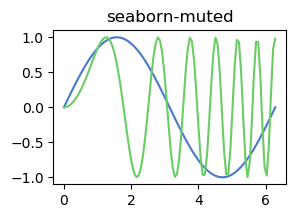

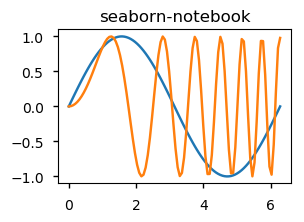

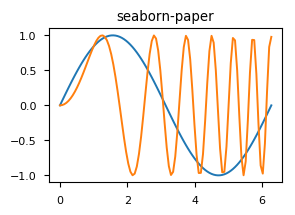

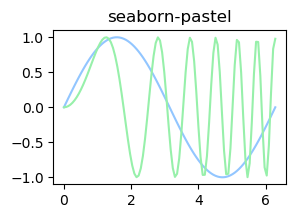

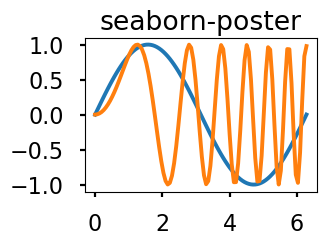

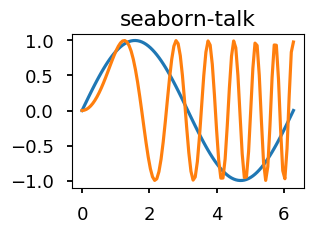

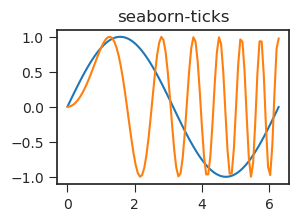

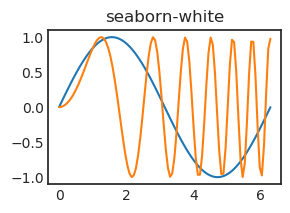

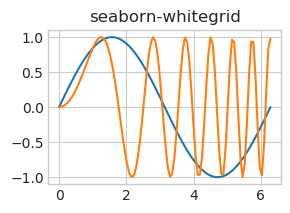

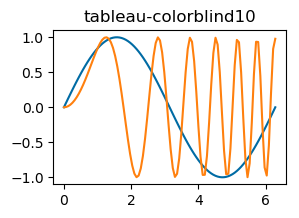

In [77]:
for ii,style in enumerate(sorted(plt.style.available)):
    with plt.style.context(style,after_reset=True):
        fig,ax = plt.subplots(figsize=(3,2),num=ii)
        ax.plot(X,Y1,label='Y1')
        ax.plot(X,Y2,label='Y2')
        ax.set_title(style)

## Just for fun

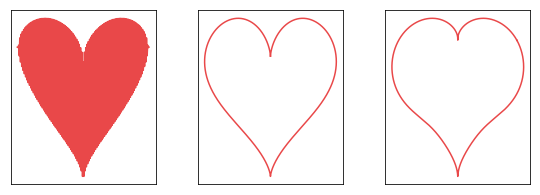

In [78]:
fig,axes = plt.subplots(1,3,figsize=(8,3))
c = (0.9152941176470588, 0.2815686274509803, 0.2878431372549019)

x = np.linspace(-1.6,1.6,10**4)
y = np.real( ( np.lib.scimath.sqrt(np.cos(x)) * np.cos(200*x)+np.sqrt(np.abs(x))-0.7)*(4.0-x**2)**0.01)
axes[0].plot(x,y,color=c)

t = np.linspace(0,2*np.pi,10**4)
x = 16.0 * np.sin(t)**3
y = 13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t)
axes[1].plot(x,y,color=c)

t = np.linspace(0,2*np.pi,10**4)
r = 2.0 - 2.0 * np.sin(t) + np.sin(t) * np.sqrt(np.abs(np.cos(t))) / (np.sin(t) + 1.4)
x = r * np.cos(t)
y = r * np.sin(t)
axes[2].plot(x,y,color=c)

fig.tight_layout()
for ax in axes:
    ax.set(xticks=[],yticks=[])

## Export Issues

By default, Jupyter exports images as `png`. In addition, at least with Chrome, only `png` can be viewed

Below is the command to export as PDF as well. However, markdown export tends to break (doesn't show images) when you do both exports. See workaround below

```python
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')  # Exports both png and pdf. See below for issues
set_matplotlib_formats('png') # Just pngs. Good for development
```

### Markdown Export Workaround

As noted above, markdown export images do not work with the PDF option (though PDF export does work). The workaround is as follows:

1. Include the above code block, run the code, export as markdown
1. Remove the above code (or just have `set_matplotlib_formats('png')`), run the code, export to markdown
1. Find/Replace `png)` with `pdf)` and copy the corresponding pdf files into that directory

## Changelog

* 2018-09-21 - Added color controls. Removed the function demo for `pcolormesh` since it didn't add anything. Added palette plots 
* 2018-10-30 - Added my style and also updated how to remove an axis
* 2018-12-06 - Minor fix with regular bar charts. Added stacked. Noted python 2 vs 3